In [30]:
## EX_01 proj.01 손글씨 분류하기 ##

## 모듈 import
# import sklearn
# print(sklearn.__version__) #1.0

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cls_rpt

In [22]:
## 데이터 준비 & 살펴보기
digit = load_digits(as_frame=True) #frame 확인: True
digit_data = digit.data            #feature 데이터 지정
digit_label = digit.target         #label 데이터 지정

print(digit_data.shape)          #(1797, 64) / 64개 항목으로 이뤄진 1797개의 데이터
print(digit_label.shape)         #(1797,)

print(digit.target_names)        #target class 개수: [0 1 2 3 4 5 6 7 8 9] 총 10개
print(digit.feature_names)       #feature columns가 그냥 pixel로 되어 있음
print(digit.frame)               #frame 으로 구조 확인
print(digit.DESCR)               #data 설명 확인

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0    

In [23]:
## 데이터 분리
x_train, x_test, y_train, y_test = tts(digit_data, digit_label, test_size=0.3, random_state=17)    #random_state 17 고정

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #(1257, 64), (540, 64), (1257,), (540,)

(1257, 64) (540, 64) (1257,) (540,)


In [24]:
## decision tree test

from sklearn.tree import DecisionTreeClassifier as dtc

model_tree = dtc(random_state=25)         
model_tree.fit(x_train, y_train)
tree_pred = model_tree.predict(x_test)

print(cls_rpt(y_test, tree_pred))              #precision 0.86, recall 0.85, f1 score 0.85

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.78      0.78      0.78        59
           2       0.82      0.82      0.82        49
           3       0.86      0.75      0.80        57
           4       0.80      0.88      0.84        56
           5       0.83      0.92      0.87        59
           6       0.93      0.91      0.92        47
           7       0.93      0.91      0.92        56
           8       0.79      0.79      0.79        48
           9       0.86      0.84      0.85        58

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540



In [25]:
## random forest test

from sklearn.ensemble import RandomForestClassifier as rfc

model_randf = rfc(random_state=25)
model_randf.fit(x_train, y_train)
randf_pred = model_randf.predict(x_test)

print(cls_rpt(y_test, randf_pred))             #precision 0.97, recall 0.97, f1 score 0.97

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      1.00      0.99        59
           2       0.96      1.00      0.98        49
           3       0.98      0.88      0.93        57
           4       0.98      1.00      0.99        56
           5       0.95      0.97      0.96        59
           6       1.00      0.98      0.99        47
           7       0.93      1.00      0.97        56
           8       0.94      0.96      0.95        48
           9       0.96      0.91      0.94        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [33]:
## SVM test

from sklearn.svm import LinearSVC as l_svc

# model_svm = l_svc(random_state=25, C=5, max_iter = 100000)   # ConvergenceWarning 발생해서 iter 횟수 올려줌, but 10만에서도 오류 발생

model_svm = l_svc(random_state=25, max_iter = 1000000)    # C=5일때는 횟수 백만에서도 warning 뜸 -> 횟수 냅두고 C값 디폴트로

model_svm.fit(x_train, y_train)
svm_pred = model_svm.predict(x_test)

print(cls_rpt(y_test, svm_pred))              # precision 0.94, recall 0.94, f1-score 0.93


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.89      0.93      0.91        59
           2       0.94      1.00      0.97        49
           3       0.96      0.84      0.90        57
           4       1.00      0.95      0.97        56
           5       0.90      0.95      0.93        59
           6       0.98      0.98      0.98        47
           7       0.96      0.98      0.97        56
           8       0.86      0.92      0.89        48
           9       0.89      0.84      0.87        58

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.93       540



In [27]:
## SGD test

from sklearn.linear_model import SGDClassifier as sgd

model_sgd = sgd(random_state=25)
model_sgd.fit(x_train, y_train)
sgd_pred = model_sgd.predict(x_test)

print(cls_rpt(y_test, sgd_pred))                # precision 0.93, recall 0.91, f1-score 0.91

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      0.66      0.79        59
           2       1.00      1.00      1.00        49
           3       0.98      0.86      0.92        57
           4       1.00      0.95      0.97        56
           5       0.95      0.95      0.95        59
           6       0.94      0.98      0.96        47
           7       0.86      1.00      0.93        56
           8       0.62      0.98      0.76        48
           9       0.96      0.81      0.88        58

    accuracy                           0.91       540
   macro avg       0.93      0.92      0.91       540
weighted avg       0.93      0.91      0.91       540



In [32]:
## Logistics Regression test

from sklearn.linear_model import LogisticRegression as lgr

# model_lgr = lgr(random_state=25)                  # iteration 오류 발생... 횟수를 늘려보자

model_lgr = lgr(random_state=25, max_iter=100000)   # ok 해결
model_lgr.fit(x_train, y_train)
lgr_pred = model_lgr.predict(x_test)

print(cls_rpt(y_test, lgr_pred))                  # precision 0.97, recall 0.97, f1-score 0.97

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      0.93      0.95        59
           2       0.98      1.00      0.99        49
           3       0.98      0.93      0.95        57
           4       1.00      0.98      0.99        56
           5       0.97      0.95      0.96        59
           6       0.98      0.98      0.98        47
           7       0.98      1.00      0.99        56
           8       0.88      0.96      0.92        48
           9       0.95      0.97      0.96        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



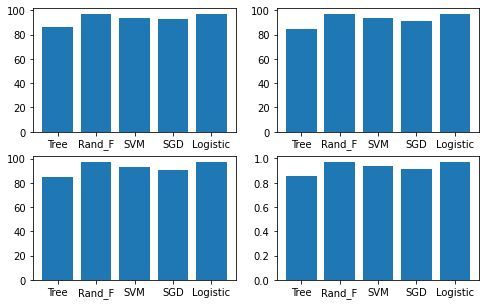

In [31]:
## 결과 모아서 보기

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score  # 다른거 확인하면서 적어놨으니까 여기선 acc만 임포트
%matplotlib inline

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(2,2,1)       # precision
ax2 = fig.add_subplot(2,2,2)       # recall
ax3 = fig.add_subplot(2,2,3)       # f1 score
ax4 = fig.add_subplot(2,2,4)       # accuracy

acc1 = accuracy_score(y_test, tree_pred)
acc2 = accuracy_score(y_test, randf_pred)
acc3 = accuracy_score(y_test, svm_pred)
acc4 = accuracy_score(y_test, sgd_pred)
acc5 = accuracy_score(y_test, lgr_pred)

subject = ['Tree', 'Rand_F', 'SVM', 'SGD', "Logistic"]

points1 = [86, 97, 94, 93, 97]             # precision
points2 = [85, 97, 94, 91, 97]             # recall
points3 = [85, 97, 93, 91, 97]             # f1 score
points4 = [acc1, acc2, acc3, acc4, acc5]   # accuracy

ax1.bar(subject, points1)
ax2.bar(subject, points2)
ax3.bar(subject, points3)
ax4.bar(subject, points4)

fig.show()

In [ ]:
## 결과

# 손글씨 구분 문제는 원본을 얼마나 정확하게 판별하냐가 중요하므로
# TP를 TP라고 맞춘 비율 = recall rate를 기준으로 판별

# 결론: logistic, randomforest 분석이 적합


## 후기(?)

# 사실 4개 그래프 모두 위의 두 방법이 적합하다고 나오긴 하는데, 둘 중 뭐가 나을지는 아직 잘 모르겠다
# SVM이 C값 잘 조절하면 두 방법보다 더 좋게 나올 수도 있을 거 같긴 한데 그 부분도 잘 모르겠다

In [36]:
## EX_01 proj.02 와인 분류하기 ##

## 모듈 import

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cls_rpt

In [39]:
## 데이터 준비 & 살펴보기

wine = load_wine(as_frame=True)  #frame 확인: True
wine_data = wine.data            #feature 데이터 지정
wine_label = wine.target         #label 데이터 지정

print(wine_data.shape)          #(178, 13) / 13개 항목으로 이뤄진 178개의 데이터
print(wine_label.shape)         #(178,)

print(wine.target_names)        #target class 개수: 3개 (0,1,2)
print(wine.feature_names)       #와인 특징 종류 13개
print(wine.frame)               #frame 으로 구조 확인
print(wine.DESCR)               #data 설명 확인

(178, 13)
(178,)
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ========

In [41]:
## 데이터 분리
x_train, x_test, y_train, y_test = tts(wine_data, wine_label, test_size=0.3, random_state=17)    #random_state 17 고정

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #(124, 13), (54, 13), (124,), (54,)

(124, 13) (54, 13) (124,) (54,)


In [42]:
## decision tree test

from sklearn.tree import DecisionTreeClassifier as dtc

model_tree = dtc(random_state=25)         
model_tree.fit(x_train, y_train)
tree_pred = model_tree.predict(x_test)

print(cls_rpt(y_test, tree_pred))              
                

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        23
           2       1.00      0.85      0.92        20

    accuracy                           0.94        54
   macro avg       0.96      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [45]:
## random forest test

from sklearn.ensemble import RandomForestClassifier as rfc

model_randf = rfc(random_state=25)
model_randf.fit(x_train, y_train)
randf_pred = model_randf.predict(x_test)

print(cls_rpt(y_test, randf_pred))             


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [50]:
## SVM test

from sklearn.svm import LinearSVC as l_svc

# model_svm = l_svc(random_state=25, max_iter = 100000)           # ConvergenceWarning 발생해서 iter 횟수 올려줌, 10만에서도 오류 발생
# model_svm = l_svc(random_state=25, C=0.1, max_iter = 100000)    # C값 조정, 여전히 covergence warning 발생
# model_svm = l_svc(random_state=25, C=0.1, max_iter = 1000000)   # 횟수 조정, 여전히 iteration increase 필요

model_svm = l_svc(random_state=25, C=0.01, max_iter = 1000000)      # 다시 C값 조정해서 해결

model_svm.fit(x_train, y_train)
svm_pred = model_svm.predict(x_test)

print(cls_rpt(y_test, svm_pred))              


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        20

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [67]:
## SGD test

from sklearn.linear_model import SGDClassifier as sgd

model_sgd = sgd(random_state=25)
model_sgd.fit(x_train, y_train)
sgd_pred = model_sgd.predict(x_test)

print(cls_rpt(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        11
           1       0.94      0.70      0.80        23
           2       0.80      0.20      0.32        20

    accuracy                           0.57        54
   macro avg       0.69      0.63      0.54        54
weighted avg       0.77      0.57      0.56        54



In [59]:
## Logistics Regression test

from sklearn.linear_model import LogisticRegression as lgr

# model_lgr = lgr(random_state=25)                  # iteration 오류 발생... 횟수를 늘려보자 // 1천번까지는 오류 발생함

model_lgr = lgr(random_state=25, max_iter=10000)   # 1만번부터 오류 안 남

model_lgr.fit(x_train, y_train)
lgr_pred = model_lgr.predict(x_test)

print(cls_rpt(y_test, lgr_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        20

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



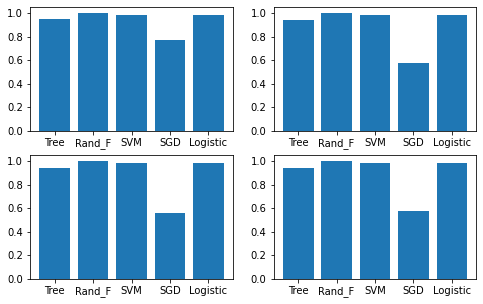

In [63]:
## 결과 모아서 보기

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(2,2,1)       # precision
ax2 = fig.add_subplot(2,2,2)       # recall
ax3 = fig.add_subplot(2,2,3)       # f1 score
ax4 = fig.add_subplot(2,2,4)       # accuracy

# accuracy
acc1 = accuracy_score(y_test, tree_pred)
acc2 = accuracy_score(y_test, randf_pred)
acc3 = accuracy_score(y_test, svm_pred)
acc4 = accuracy_score(y_test, sgd_pred)
acc5 = accuracy_score(y_test, lgr_pred)

# precision
# cls_rpt 보니 데이터 불균형이 있어서 가중치 설정
prc1 = precision_score(y_test, tree_pred, average = 'weighted')
prc2 = precision_score(y_test, randf_pred, average = 'weighted')
prc3 = precision_score(y_test, svm_pred, average = 'weighted')
prc4 = precision_score(y_test, sgd_pred, average = 'weighted')
prc5 = precision_score(y_test, lgr_pred, average = 'weighted')

# recall
# 마찬가지로 가중치 설정
rec1 = recall_score(y_test, tree_pred, average = 'weighted')
rec2 = recall_score(y_test, randf_pred, average = 'weighted')
rec3 = recall_score(y_test, svm_pred, average = 'weighted')
rec4 = recall_score(y_test, sgd_pred, average = 'weighted')
rec5 = recall_score(y_test, lgr_pred, average = 'weighted')

# f1 score
# 가중치 설정
fsc1 = f1_score(y_test, tree_pred, average = 'weighted')
fsc2 = f1_score(y_test, randf_pred, average = 'weighted')
fsc3 = f1_score(y_test, svm_pred, average = 'weighted')
fsc4 = f1_score(y_test, sgd_pred, average = 'weighted')
fsc5 = f1_score(y_test, lgr_pred, average = 'weighted')

subject = ['Tree', 'Rand_F', 'SVM', 'SGD', "Logistic"]

points1 = [prc1, prc2, prc3, prc4, prc5]   # precision
points2 = [rec1, rec2, rec3, rec4, rec5]   # recall
points3 = [fsc1, fsc2, fsc3, fsc4, fsc5]   # f1 score
points4 = [acc1, acc2, acc3, acc4, acc5]   # accuracy

ax1.bar(subject, points1)
ax2.bar(subject, points2)
ax3.bar(subject, points3)
ax4.bar(subject, points4)

fig.show()

In [ ]:
## 결과

# cls_rpt 보면 대부분 데이터가 들쭉날쭉함
# 데이터 불균형이 심하니까 f1 score 사용

# 비교표를 보면 random forest가 best 성능으로 나옴


## 후기(?)

# SGD는 왜 저렇게 성능이 떨어지지?
# precision 점수만 (비교적) 높은거 보니까 맞는 거 맞다고는 잘 하는데 나머지를 못한다
# 찾아보니 빅데이터일때 성능 떨어진다는데... digit 구분할때는 wine보다 데이터 수가 많아도 잘 작동하던데 why?

# 데이터 불균형이 심하면 SVM 성능이 떨어져야 하는 것 아닌가?

# 아직 모델에 대한 이해가 부족한 듯

In [69]:
## EX_01 proj.03 유방암 구분하기 ##

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cls_rpt

In [78]:
## 데이터 준비 & 살펴보기

cancer = load_breast_cancer(as_frame=True)  #frame 확인: True
cancer_data = cancer.data            #feature 데이터 지정
cancer_label = cancer.target         #label 데이터 지정

print(cancer_data.shape)          #(569, 30) / 30개 항목으로 이뤄진 569개의 데이터
print(cancer_label.shape)         #(569,)

print(cancer.target_names)        #target class 개수: 2개 (malignant, benign) / m-: 악성, b-: 양성
print(cancer.feature_names)       #유방암 특징 종류 30개
print(cancer.frame)               #frame 으로 구조 확인
print(cancer.DESCR)               #data 설명 확인

(569, 30)
(569,)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.2

In [80]:
## 데이터 분리
x_train, x_test, y_train, y_test = tts(cancer_data, cancer_label, test_size=0.3, random_state=17)    #random_state 17 고정

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #(398, 30), (171,30), (398,), (171,)

(398, 30) (171, 30) (398,) (171,)


In [81]:
## decision tree test

from sklearn.tree import DecisionTreeClassifier as dtc

model_tree = dtc(random_state=25)         
model_tree.fit(x_train, y_train)
tree_pred = model_tree.predict(x_test)

print(cls_rpt(y_test, tree_pred))              
                

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        61
           1       0.94      0.93      0.93       110

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



In [82]:
## random forest test

from sklearn.ensemble import RandomForestClassifier as rfc

model_randf = rfc(random_state=25)
model_randf.fit(x_train, y_train)
randf_pred = model_randf.predict(x_test)

print(cls_rpt(y_test, randf_pred))             


              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [103]:
## SVM test

from sklearn.svm import LinearSVC as l_svc

# model_svm = l_svc(random_state=25, max_iter = 100000)           # ConvergenceWarning 발생, 10만 회 여전히 오류 발생
# model_svm = l_svc(random_state=25, C=0.1, max_iter = 100000)    # C값 조정, 오류 발생
# model_svm = l_svc(random_state=25, C=0.1, max_iter = 1000000)   # 횟수 조정, 오류 발생

# model_svm = l_svc(random_state=25, C=0.01, max_iter = 1000000)    # C값 조정, 횟수 증가, 오류 안 남, 횟수 늘려도 데이터 안 바뀜
model_svm = l_svc(random_state=25, C=0.02, max_iter = 2000000)      # C값 조정, 횟수 증가, 정확도 상승 (0.92->0.93)

model_svm.fit(x_train, y_train)
svm_pred = model_svm.predict(x_test)

print(cls_rpt(y_test, svm_pred))      

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        61
           1       0.95      0.95      0.95       110

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [90]:
## SGD test

from sklearn.linear_model import SGDClassifier as sgd

model_sgd = sgd(random_state=25)
model_sgd.fit(x_train, y_train)
sgd_pred = model_sgd.predict(x_test)

print(cls_rpt(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        61
           1       0.97      0.85      0.90       110

    accuracy                           0.88       171
   macro avg       0.87      0.90      0.88       171
weighted avg       0.90      0.88      0.89       171



In [98]:
## Logistics Regression test

from sklearn.linear_model import LogisticRegression as lgr

# model_lgr = lgr(random_state=25)                  # iteration 오류 발생, 횟수 조정 // 1천번까지 오류 발생

model_lgr = lgr(random_state=25, max_iter=10000)   # 1만번부터 오류 안 남, 횟수 늘려도 차이 없음

model_lgr.fit(x_train, y_train)
lgr_pred = model_lgr.predict(x_test)

print(cls_rpt(y_test, lgr_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.96      0.95      0.96       110

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



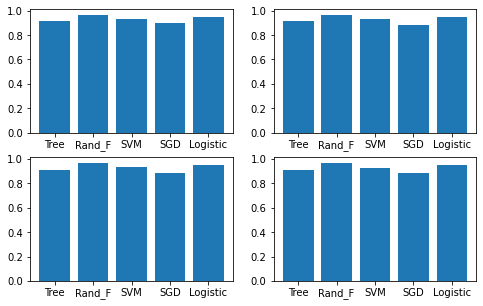

In [104]:
## 결과 모아서 보기

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(2,2,1)       # precision
ax2 = fig.add_subplot(2,2,2)       # recall
ax3 = fig.add_subplot(2,2,3)       # f1 score
ax4 = fig.add_subplot(2,2,4)       # accuracy

# accuracy
acc1 = accuracy_score(y_test, tree_pred)
acc2 = accuracy_score(y_test, randf_pred)
acc3 = accuracy_score(y_test, svm_pred)
acc4 = accuracy_score(y_test, sgd_pred)
acc5 = accuracy_score(y_test, lgr_pred)

# precision
# cls_rpt 보니 데이터 불균형이 있어서(별로 크지 않은 것 같지만 일단은) 가중치 설정
prc1 = precision_score(y_test, tree_pred, average = 'weighted')
prc2 = precision_score(y_test, randf_pred, average = 'weighted')
prc3 = precision_score(y_test, svm_pred, average = 'weighted')
prc4 = precision_score(y_test, sgd_pred, average = 'weighted')
prc5 = precision_score(y_test, lgr_pred, average = 'weighted')

# recall
# 가중치 설정
rec1 = recall_score(y_test, tree_pred, average = 'weighted')
rec2 = recall_score(y_test, randf_pred, average = 'weighted')
rec3 = recall_score(y_test, svm_pred, average = 'weighted')
rec4 = recall_score(y_test, sgd_pred, average = 'weighted')
rec5 = recall_score(y_test, lgr_pred, average = 'weighted')

# f1 score
# 가중치 설정
fsc1 = f1_score(y_test, tree_pred, average = 'weighted')
fsc2 = f1_score(y_test, randf_pred, average = 'weighted')
fsc3 = f1_score(y_test, svm_pred, average = 'weighted')
fsc4 = f1_score(y_test, sgd_pred, average = 'weighted')
fsc5 = f1_score(y_test, lgr_pred, average = 'weighted')

subject = ['Tree', 'Rand_F', 'SVM', 'SGD', "Logistic"]

points1 = [prc1, prc2, prc3, prc4, prc5]   # precision
points2 = [rec1, rec2, rec3, rec4, rec5]   # recall
points3 = [fsc1, fsc2, fsc3, fsc4, fsc5]   # f1 score
points4 = [acc1, acc2, acc3, acc4, acc5]   # accuracy

ax1.bar(subject, points1)
ax2.bar(subject, points2)
ax3.bar(subject, points3)
ax4.bar(subject, points4)

fig.show()

In [ ]:
## 결과

# cls_rpt 보면 데이터 불균형이 있긴 한데 심하진 않음
# 암 환자 구분은 음성을 양성판정하는 건 괜찮지만, 양성을 음성판정하면 안되므로 precision을 기준으로 사용

# 비교표를 보면 random forest가 best 성능으로 나옴


## 후기(?)

# 전반적으로 random forest 모델 성능이 best
# 왜 why? ...찾아봐도 그냥 성능이 좋다는 말만 나옴.. 왜 좋냐구 그러니까...

# 반대로 SGD는 전반적으로 성능이 좋지 않음
# logistic이나 svm에서 iteration 횟수 증가시켜도 정확도 오르지 않음

# svm에서 C값을 늘리면 iteration 횟수도 늘려줘야 함
# 대신 정확도가 오르는데... 왜 why? -> c값이 크면 오류를 그만큼 허용하지 않음, but iteration 숫자가 많아지니까 오버피팅 될 수 있음
